<a href="https://colab.research.google.com/github/Shweta-singh1/QUILL__GUARD/blob/WORD2VEC/QUILL___GUARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA PREPRCOCESSING

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
#libraries for data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#reading the dataset
colnames=['file_1', 'file_2', 'label']
df=pd.read_csv(r"/content/drive/MyDrive/train_snli.txt",sep='\t',on_bad_lines='skip',names=colnames)

In [ ]:
# Convert the label column to integers
df['label'] = df['label'].astype(int)

In [ ]:
df.head()

,file_1,file_2,label
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
2,Children smiling and waving at camera,There are children present,1
3,Children smiling and waving at camera,The kids are frowning,0
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a string
    return ' '.join(tokens)

In [ ]:
df['file_1'] = df['file_1'].apply(preprocess_text)
df['file_2'] = df['file_2'].apply(preprocess_text)

In [ ]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Create Word2Vec embeddings
corpus = df['file_1'].tolist() + df['file_2'].tolist()
corpus = [sentence.split() for sentence in corpus]
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
def compute_similarity(doc1, doc2):
    doc1_vec = np.mean([model.wv[word] for word in doc1.split() if word in model.wv], axis=0)
    doc2_vec = np.mean([model.wv[word] for word in doc2.split() if word in model.wv], axis=0)
    return np.dot(doc1_vec, doc2_vec) / (np.linalg.norm(doc1_vec) * np.linalg.norm(doc2_vec))

In [ ]:
df['similarity'] = df.apply(lambda x: compute_similarity(x['file_1'], x['file_2']), axis=1)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
pd.DataFrame(df)

,file_1,file_2,label,similarity
0,person horse jumps broken airplane,person diner ordering omelette,0,0.164523
1,person horse jumps broken airplane,person outdoors horse,1,0.729174
2,children smiling waving camera,children present,1,0.466311
3,children smiling waving camera,kids frowning,0,0.380064
4,boy jumping skateboard middle red bridge,boy skates sidewalk,0,0.638071
...,...,...,...,...
367368,dog blue collar plays ball outside,dog outside,1,0.642533
367369,four dirty barefooted children,four children dirty feet,1,0.913625
367370,four dirty barefooted children,four kids awards cleanest feet,0,0.843549
367371,man surfing bodysuit beautiful blue water,man business suit heading board meeting,0,0.389935


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367369 entries, 0 to 367372
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   file_1      367369 non-null  object
 1   file_2      367369 non-null  object
 2   label       367369 non-null  int64 
 3   similarity  367369 non-null  object
dtypes: int64(1), object(3)
memory usage: 14.0+ MB
None


In [ ]:
print(df.describe())

               label
count  367369.000000
mean        0.499239
std         0.500000
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


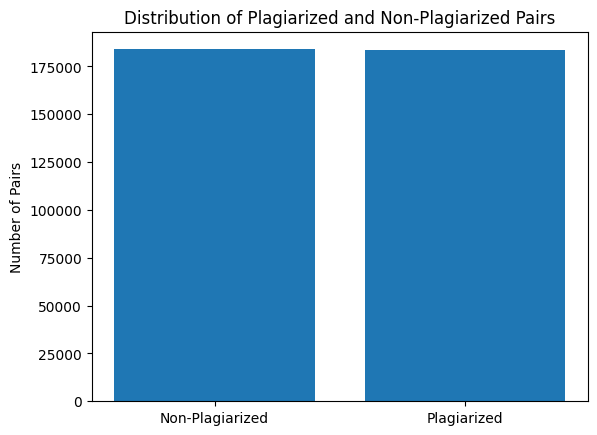

In [ ]:
# Count the number of plagiarized and non-plagiarized pairs
counts = df['label'].value_counts()

# Plot a bar chart of the counts
plt.bar(counts.index, counts.values)
plt.xticks([0, 1], ['Non-Plagiarized', 'Plagiarized'])
plt.ylabel('Number of Pairs')
plt.title('Distribution of Plagiarized and Non-Plagiarized Pairs')
plt.show()

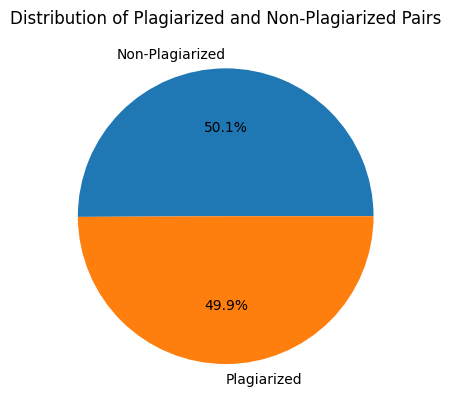

In [ ]:
# Plot a pie chart of the counts
plt.pie(counts.values,labels=['Non-Plagiarized', 'Plagiarized'],autopct='%1.1f%%')
plt.title('Distribution of Plagiarized and Non-Plagiarized Pairs')
plt.show()

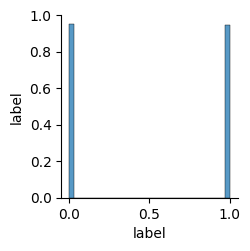

In [ ]:
sns.pairplot(df)

In [ ]:
df.head(5)

,file_1,file_2,label,similarity
0,person horse jumps broken airplane,person diner ordering omelette,0,0.164523
1,person horse jumps broken airplane,person outdoors horse,1,0.729174
2,children smiling waving camera,children present,1,0.466311
3,children smiling waving camera,kids frowning,0,0.380064
4,boy jumping skateboard middle red bridge,boy skates sidewalk,0,0.638071


In [ ]:
# Identify non-numeric values in similarity column
mask = pd.to_numeric(df['similarity'], errors='coerce').isna()

In [ ]:
# Print the rows containing non-numeric values
print(df[mask])
df = df[~mask]

                                                   file_1 file_2  label  \
34813                                          man speech             0   
61108   two people stage one holding microphone anothe...             0   
93709                               ritual fire happening             1   
131055  young girl wearing blue shirt marching band pl...             0   
144983                      person runs waters edge ocean             0   
164459            young woman sits alone mountainous area             1   
279212  white kitchen corner displaying microwave garb...             1   
304738             two men white practicing fencing court             0   
322755                 mature couple dancing middle stage             0   
354149  three men standing golf course one middle taki...             0   
354150  three men standing golf course one middle taki...             1   

                                               similarity  
34813   [nan, nan, nan, nan, nan, nan, 

In [ ]:
# Identify non-numeric values in similarity column
mask = pd.to_numeric(df['similarity'], errors='coerce').isna()

In [ ]:
df = df[~mask]

In [ ]:
df['similarity'] = df['similarity'].astype(float)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
X = df[['similarity']].values
y = df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
X_train

array([[0.52074963],
       [0.27954495],
       [0.78546119],
       ...,
       [0.83500862],
       [0.75414073],
       [0.61076134]])

In [ ]:
# Create a new DataFrame for the test data
X_test_df = pd.DataFrame(X_test)

In [ ]:
test_indices=X_test_df.index

In [ ]:
# Create a new DataFrame for the test data
test_df = pd.DataFrame(X_test, columns=['similarity'])

# Add the 'file_1', 'file_2', and 'label' columns from the original DataFrame
test_df[['file_1', 'file_2', 'label']] = df.loc[test_indices, ['file_1', 'file_2', 'label']].reset_index(drop=True)
# change the column order
test_df = test_df.reindex(columns=['file_1', 'file_2', 'label','similarity'])



In [ ]:
test_df

,file_1,file_2,label,similarity
0,person horse jumps broken airplane,person diner ordering omelette,0,0.386210
1,person horse jumps broken airplane,person outdoors horse,1,0.735940
2,children smiling waving camera,children present,1,0.811918
3,children smiling waving camera,kids frowning,0,0.265909
4,boy jumping skateboard middle red bridge,boy skates sidewalk,0,0.673870
...,...,...,...,...
183674,many people walking street one person dressed ...,people shopping store,0,0.006021
183675,woman holding drink one hand pointing painting,madame curie points ovaries destroyed radium,0,0.678781
183676,woman holding drink one hand pointing painting,woman calling attention art,1,0.680975
183677,blond woman short denim skirt black top beige ...,woman blonde,1,0.575875


CLASSIFICATION(TESTING)


In [ ]:
import xgboost as xgb


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(learning_rate=0.3456782,max_depth=2,n_estimators=150,subsample=0.738940)

In [ ]:
# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3456782,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)


In [ ]:
# Create a new column 'predicted labels (XGB)' in the dataframe 'df' with values from 'y_pred'
test_df['predicted_labels(XGB)'] = y_pred

In [ ]:
test_df.head()

,file_1,file_2,label,similarity,predicted_labels(XGB)
0,person horse jumps broken airplane,person diner ordering omelette,0,0.386210,0
1,person horse jumps broken airplane,person outdoors horse,1,0.735940,1
2,children smiling waving camera,children present,1,0.811918,1
3,children smiling waving camera,kids frowning,0,0.265909,0
4,boy jumping skateboard middle red bridge,boy skates sidewalk,0,0.673870,1


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
# Compute the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6593840341029731


In [ ]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.60      0.64     91808
           1       0.64      0.72      0.68     91871

    accuracy                           0.66    183679
   macro avg       0.66      0.66      0.66    183679
weighted avg       0.66      0.66      0.66    183679



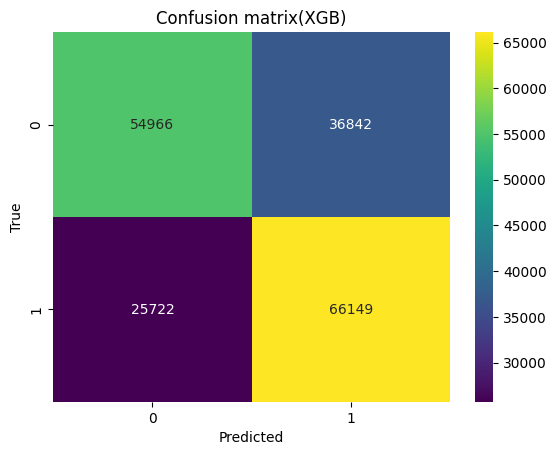

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(cm1, annot=True, cmap="viridis", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(XGB)")
plt.show()

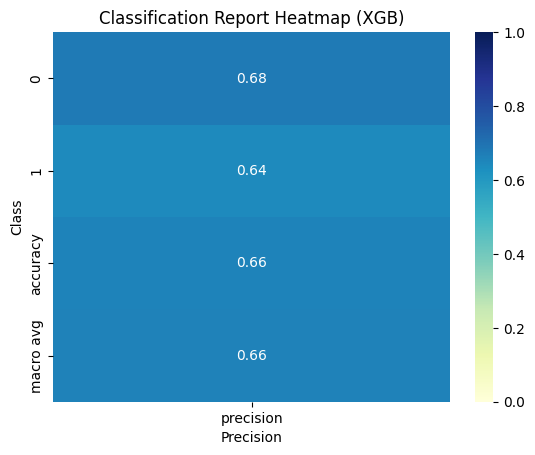

In [ ]:
# generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# convert report to dataframe
dff = pd.DataFrame(report).transpose()

# create heatmap
sns.heatmap(dff.iloc[:-1, :-3], annot=True, cmap="YlGnBu", vmin=0, vmax=1)

# add labels and title
plt.xlabel("Precision")
plt.ylabel("Class")
plt.title("Classification Report Heatmap (XGB)")
plt.show()

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
clf = LGBMClassifier()

In [ ]:
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred_clf = clf.predict(X_test)

In [ ]:
test_df['predicted_labels(LGBM)'] = y_pred_clf

In [ ]:
test_df.head()

,file_1,file_2,label,similarity,predicted_labels(XGB),predicted_labels(LGBM)
0,person horse jumps broken airplane,person diner ordering omelette,0,0.386210,0,0
1,person horse jumps broken airplane,person outdoors horse,1,0.735940,1,1
2,children smiling waving camera,children present,1,0.811918,1,1
3,children smiling waving camera,kids frowning,0,0.265909,0,0
4,boy jumping skateboard middle red bridge,boy skates sidewalk,0,0.673870,1,1


In [ ]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_clf)
print("Accuracy: ", accuracy)

Accuracy:  0.6596780252505731


In [ ]:
print(classification_report(y_test, y_pred_clf))


              precision    recall  f1-score   support

           0       0.68      0.60      0.64     91808
           1       0.64      0.72      0.68     91871

    accuracy                           0.66    183679
   macro avg       0.66      0.66      0.66    183679
weighted avg       0.66      0.66      0.66    183679



In [ ]:
cm2 = confusion_matrix(y_test, y_pred_clf)
# create heatmap
sns.heatmap(cm2, annot=True, cmap="cool", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(LGBM)")
plt.show()

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf1 = LogisticRegression()

In [ ]:
clf1.fit(X_train, y_train)

LogisticRegression()

0.6593840341029731
              precision    recall  f1-score   support

           0       0.68      0.60      0.64     91808
           1       0.64      0.72      0.68     91871

    accuracy                           0.66    183679
   macro avg       0.66      0.66      0.66    183679
weighted avg       0.66      0.66      0.66    183679



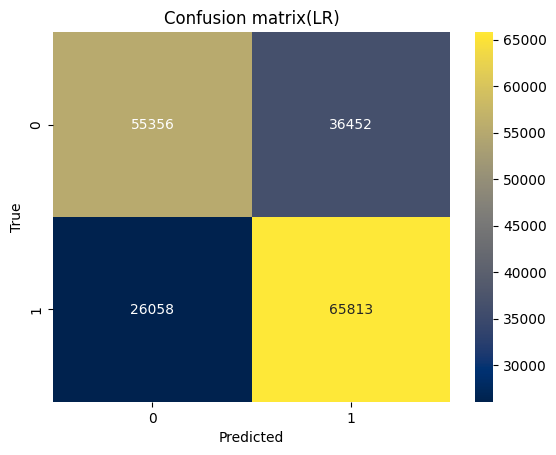

In [ ]:
# Predict labels for the test data
y_pred_2 = clf.predict(X_test)
threshold = 0.3999
y_pred_1=(y_pred_2 >= threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_2)
# create heatmap
sns.heatmap(cm, annot=True, cmap="cividis", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(LR)")

plt.show()

In [ ]:
test_df['predicted_labels(LR)'] = y_pred_2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
test_df['predicted_labels(RF)'] = y_pred_rf

In [ ]:
test_df.head()

,file_1,file_2,label,similarity,predicted_labels(XGB),predicted_labels(LGBM),predicted_labels(LR),predicted_labels(RF)
0,person horse jumps broken airplane,person diner ordering omelette,0,0.386210,0,0,0,1
1,person horse jumps broken airplane,person outdoors horse,1,0.735940,1,1,1,1
2,children smiling waving camera,children present,1,0.811918,1,1,1,1
3,children smiling waving camera,kids frowning,0,0.265909,0,0,0,0
4,boy jumping skateboard middle red bridge,boy skates sidewalk,0,0.673870,1,1,1,1


In [ ]:
test_df.columns

Index(['file_1', 'file_2', 'label', 'similarity', 'predicted_labels(XGB)',
       'predicted_labels(LGBM)', 'predicted_labels(LR)',
       'predicted_labels(RF)'],
      dtype='object')

0.5712302440670953
              precision    recall  f1-score   support

           0       0.57      0.57      0.57     91808
           1       0.57      0.57      0.57     91871

    accuracy                           0.57    183679
   macro avg       0.57      0.57      0.57    183679
weighted avg       0.57      0.57      0.57    183679



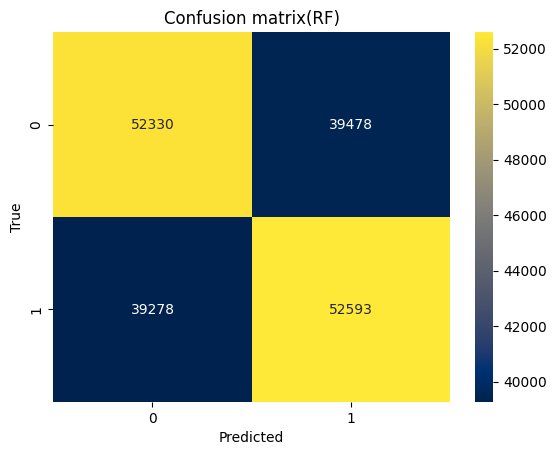

In [ ]:
# compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_rf)
print(accuracy)
print(classification_report(y_test, y_pred_rf))
cm2=confusion_matrix(y_test, y_pred_rf)
# create heatmap
sns.heatmap(cm2, annot=True, cmap="cividis", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix(RF)")

plt.show()

In [ ]:
test_df.head()

,file_1,file_2,label,similarity,predicted_labels(XGB),predicted_labels(LGBM),predicted_labels(LR),predicted_labels(RF)
0,person horse jumps broken airplane,person diner ordering omelette,0,0.386210,0,0,0,1
1,person horse jumps broken airplane,person outdoors horse,1,0.735940,1,1,1,1
2,children smiling waving camera,children present,1,0.811918,1,1,1,1
3,children smiling waving camera,kids frowning,0,0.265909,0,0,0,0
4,boy jumping skateboard middle red bridge,boy skates sidewalk,0,0.673870,1,1,1,1


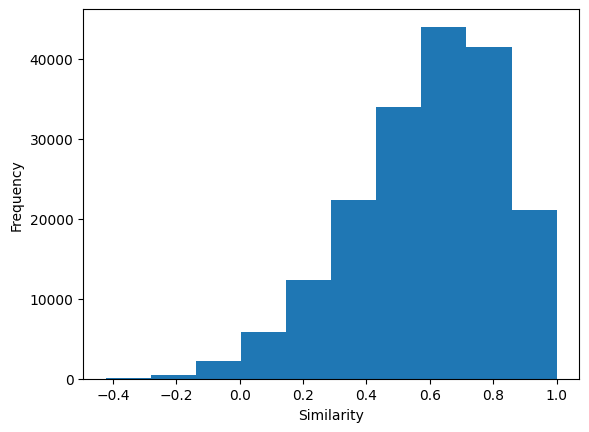

In [ ]:
import matplotlib.pyplot as plt

plt.hist(test_df['similarity'])
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

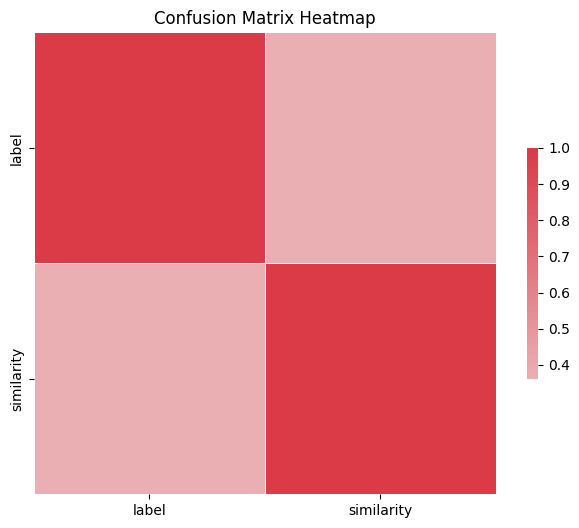

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(8,6))

# Set the colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# add a title
ax.set_title("Confusion Matrix Heatmap")
plt.show()


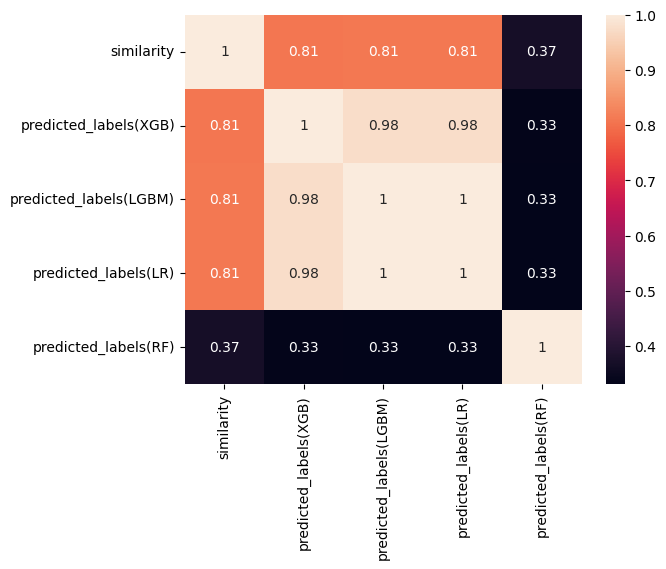

In [ ]:
import seaborn as sns

corr = test_df[['similarity', 'predicted_labels(XGB)', 'predicted_labels(LGBM)', 'predicted_labels(LR)', 'predicted_labels(RF)']].corr()
sns.heatmap(corr, annot=True)
plt.show()


In [ ]:
def check_plagiarism1(doc1, doc2, threshold):
    # Preprocess the texts
    doc1 = preprocess_text(doc1)
    doc2 = preprocess_text(doc2)
    
    # Create Word2Vec embeddings
    corpus = [doc1, doc2]
    corpus = [sentence.split() for sentence in corpus]
    model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)
    
    # Calculate similarity score
    similarity_score = compute_similarity(doc1, doc2)
    print("Similarity score:", similarity_score)
     # Check if the similarity score is above the threshold
    if similarity_score >= threshold:
        return "The documents are plagiarized. Similarity score: {:.2f}".format(similarity_score), similarity_score
    else:
        return "The documents are not plagiarized. Similarity score: {:.2f}".format(similarity_score), similarity_score

In [ ]:
text_2='There are several types of machine learning algorithms, each with its strengths and weaknesses.Supervised learning algorithms require labeled data, with each example in the training set being labeled with a known output. These algorithms then use this labeled data to learn how to make predictions on new data.Unsupervised learning algorithms, on the other hand, do not require labeled data. Instead, they use clustering, dimensionality reduction, and other techniques to identify patterns and relationships within the data.Semi-supervised learning algorithms combine elements of both supervised and unsupervised learning. They use a small amount of labeled data to guide the learning process, but also incorporate unsupervised techniques to identify patterns within the larger, unlabeled dataset.Reinforcement learning algorithms involve an agent learning from interactions with an environment to maximize a reward signal. These algorithms are commonly used in robotics and game playing applications.Overall, the choice of algorithm depends on the specific problem being addressed and the available data.'

In [ ]:
text_1='Machine learning is a subfield of artificial intelligence that involves the development of algorithms and statistical models that enable computer systems to automatically learn and improve from experience without being explicitly programmed. It is used in a variety of applications, including image and speech recognition, natural language processing, and autonomous systems. The process of machine learning involves training a model on a set of data and using it to make predictions or decisions based on new data. This process can be supervised, unsupervised, or semi-supervised. Machine learning has the potential to revolutionize many industries, including healthcare, finance, and transportation, by enabling faster and more accurate decision-making and analysis.' 

In [ ]:
check_plagiarism1(text_1, text_2, threshold=0.55)

Similarity score: 0.8685447


('The documents are plagiarized. Similarity score: 0.87', 0.8685447)

In [ ]:
def check_plagiarism(file1, file2, threshold):
    # Read text files
    with open(file1, 'r') as f:
        doc1 = f.read()
    with open(file2, 'r') as f:
        doc2 = f.read()
    
    # Preprocess the texts
    doc1 = preprocess_text(doc1)
    doc2 = preprocess_text(doc2)
    
    # Create Word2Vec embeddings
    corpus = [doc1, doc2]
    corpus = [sentence.split() for sentence in corpus]
    model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)
    
    # Calculate similarity score
    similarity_score = compute_similarity(doc1, doc2)
    print("Similarity score:", similarity_score)
    
     # Check if similarity score is above threshold
    # Check if the similarity score is above the threshold
    if similarity_score >= threshold:
        return "The documents are plagiarized. Similarity score: {:.2f}".format(similarity_score), similarity_score
    else:
        return "The documents are not plagiarized. Similarity score: {:.2f}".format(similarity_score), similarity_score


In [ ]:
check_plagiarism('/content/tech.text.txt','/content/world.txt.txt', 0.8899)

Similarity score: 0.7604606


('The documents are not plagiarized. Similarity score: 0.76', 0.7604606)

In [ ]:
check_plagiarism('/content/global.txt','/content/arti.txt', 0.8899)

Similarity score: 0.88359904


'The two texts are not similar and are likely not plagiarized. Similarity score: 0.883599042892456'

In [ ]:
check_plagiarism('/content/tech.text.txt','/content/techp.txt', 0.8899)

Similarity score: 0.9297639


'The two texts are similar and may be considered plagiarized. Similarity score: 0.929763913154602'

In [ ]:
text__1='These machines do not have any memory storage capacity but can process information and make situation-based decisions'

In [ ]:
text__2='The earth’s ocean temperatures are getting warmer, too—which means that tropical storms can pick up more energy'

In [ ]:
check_plagiarism1(text__1,text__2, 0.8899)

Similarity score: 0.2787694


('The documents are not plagiarized. Similarity score: 0.28', 0.2787694)

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [108]:
iface = gr.Interface(
    fn=check_plagiarism1, 
    inputs=["textbox", "textbox", gr.inputs.Slider(0.0, 1.0, step=0.05, label="Threshold")], 
    outputs="text",
    title="QUILL_GUARD",
    description="Check if two texts are plagiarized and get similarity score.",
    examples=[["This is the first text.", "This is the second text.", 0.7]],
    theme="compact"
)

iface.launch()

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:528: UserWarning: Cannot load compact. Caught Exception: The space compact does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [109]:
iface = gr.Interface(
    fn=check_plagiarism, 
    inputs=[gr.inputs.File(label="Text file 1"), gr.inputs.File(label="Text file 2"), gr.inputs.Slider(0.0, 1.0, step=0.05, label="Threshold")], 
    outputs="text",
    title="QUILL_GUARD",
    description="Check if two text files are plagiarized and get similarity score.",
    examples=[["/content/tech.text.txt", "/content/techp.txt", 0.7]],
    theme="compact"
)

iface.launch()

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:347: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `keep_filename` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:528: UserWarning: Cannot load compact. Caught Exception: The space compact does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>